# ML Clasificadores: K-Means (Clustering)

In [1]:
import pandas as pd

In [2]:
ruta = './DataSet/csv/Mall_Customers-2.csv'

In [3]:
df = pd.read_csv(ruta, index_col=0)

In [4]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [6]:
df.rename({'Gender':'Género','Age':'Edad','Annual Income (k$)':'Ingresos','Spending Score (1-100)':'Gastos'}, axis=1, inplace=True)

In [7]:
df

,Género,Edad,Ingresos,Gastos
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


## Análisis exploratorio de datos

In [8]:
df.describe()

,Edad,Ingresos,Gastos
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [9]:
df['Género'].value_counts()

Género
Female    112
Male       88
Name: count, dtype: int64

## Segmentación tradicional

<Axes: ylabel='Frequency'>

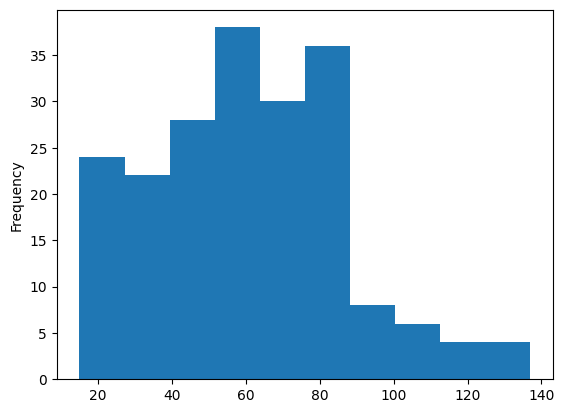

In [10]:
df.Ingresos.plot.hist()

<Axes: ylabel='Frequency'>

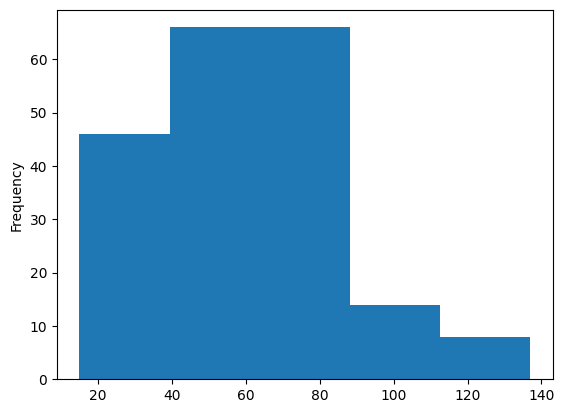

In [11]:
df.Ingresos.plot.hist(bins=5)

___Reglas a seguir:___
- Si ingreso < 50 entonces ___'Ingreso bajo'___
- Si 50 <= Ingresos < 90 ___'Ingreso moderado'___
- Si Ingresos > 90 ___'Ingreso alto"___

In [12]:
import numpy as np

In [13]:
df['Segmento'] = np.where(df.Ingresos > 90, 'Ingreso alto',
                          np.where(df.Ingresos < 50, 'Ingreso bajo', 'Ingreso moderado'))

In [14]:
df

,Género,Edad,Ingresos,Gastos,Segmento
CustomerID,,,,,
1,Male,19,15,39,Ingreso bajo
2,Male,21,15,81,Ingreso bajo
3,Female,20,16,6,Ingreso bajo
4,Female,23,16,77,Ingreso bajo
5,Female,31,17,40,Ingreso bajo
...,...,...,...,...,...
196,Female,35,120,79,Ingreso alto
197,Female,45,126,28,Ingreso alto
198,Male,32,126,74,Ingreso alto


In [15]:
df.Segmento.value_counts()

Segmento
Ingreso moderado    106
Ingreso bajo         72
Ingreso alto         22
Name: count, dtype: int64

In [17]:
df.groupby('Segmento')['Ingresos'].describe()

,count,mean,std,min,25%,50%,75%,max
Segmento,,,,,,,,
Ingreso alto,22.0,108.181818,13.661334,93.0,98.25,103.0,118.25,137.0
Ingreso bajo,72.0,33.027778,11.091136,15.0,22.50,33.5,43.00,49.0
Ingreso moderado,106.0,69.377358,10.651584,50.0,61.00,70.0,78.00,88.0


## Estandarización de datos

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
escalador = StandardScaler()

In [ ]:
col_a_escalar = ['Edad', 'Ingresos', 'Gasto']
datos_a_escalar = df.copy()